# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table("fruit_data_with_colors.txt")

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

# I believe the below dataset is to train and test models that use 2 features
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits
                                                   , random_state = 0)

# If I remember correctly, this is to scale all feature values to [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must also apply scaling to the test set
X_test_scaled = scaler.fit_transform(X_test)

# create and train classifier with scaled X data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

# predict a fruit's label
example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is'
     , target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.80
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is mandarin


## Datasets

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

# synthetic dataset for simple regression
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples=100, n_features=1
                            , n_informative=1, bias=150.0
                            , noise=30, random_state=0)

# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)

# synthetic dataset for classification (binary)
X_C2, y_C2 = make_classification(n_samples=100, n_features=2, n_redundant=0
                                 , n_informative=2, n_clusters_per_class=1
                                 , flip_y=0.1, class_sep=0.5, random_state=0)

# more difficult sythetic dataset for classification (binary) with classes that
# are not linearly separable
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3
                       , random_state=4)
y_D2 = y_D2 % 2

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## K-Nearest Neighbors

### Classification

<IPython.core.display.Javascript object>


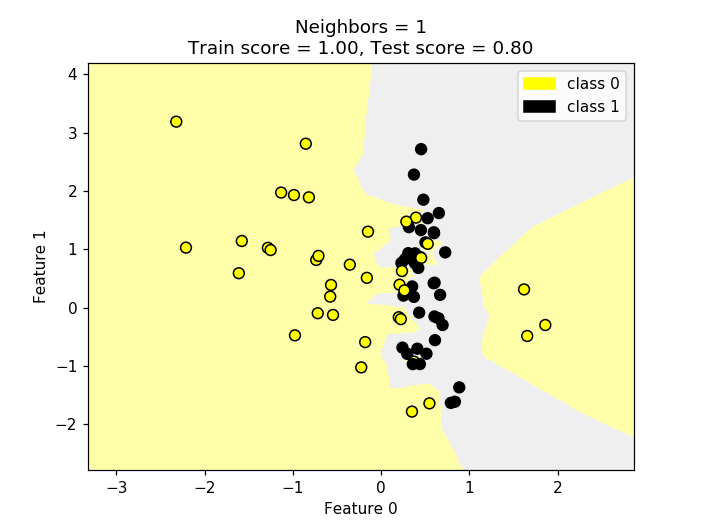

<IPython.core.display.Javascript object>


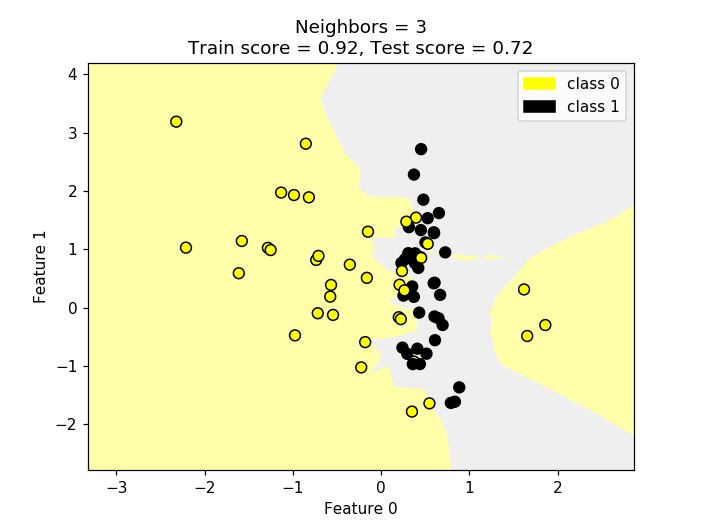

<IPython.core.display.Javascript object>


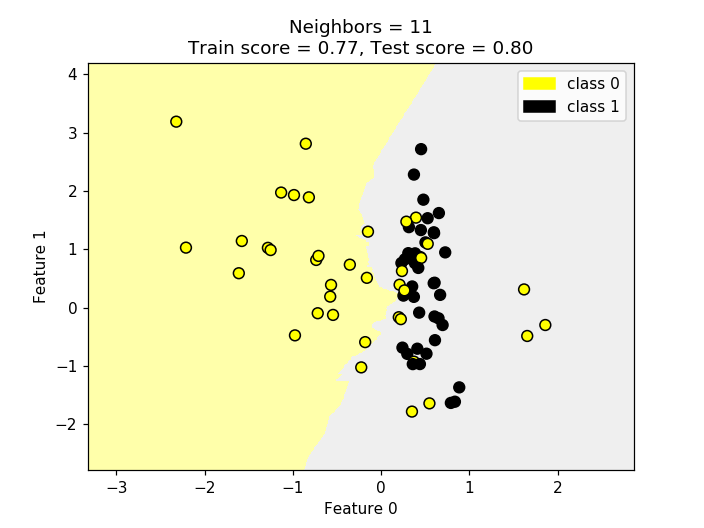

In [3]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)

# create and train regressor
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


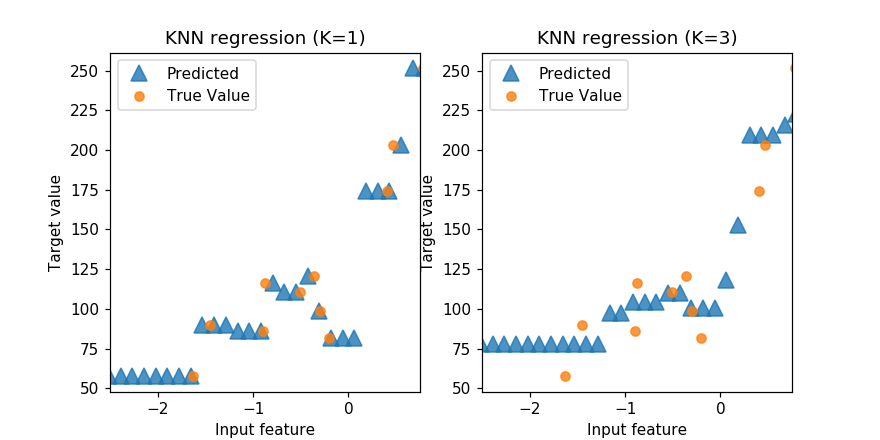

<function matplotlib.pyplot.tight_layout>

In [5]:
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)

# [0::5] = 0 to end by 5?
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5]
                                                   , random_state=0)

for thisaxis, K in zip(subaxes, [1, 3]):
    # creating and training regressor using 1 and 3 neighbors
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize=10
                 , label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
    
plt.tight_layout

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


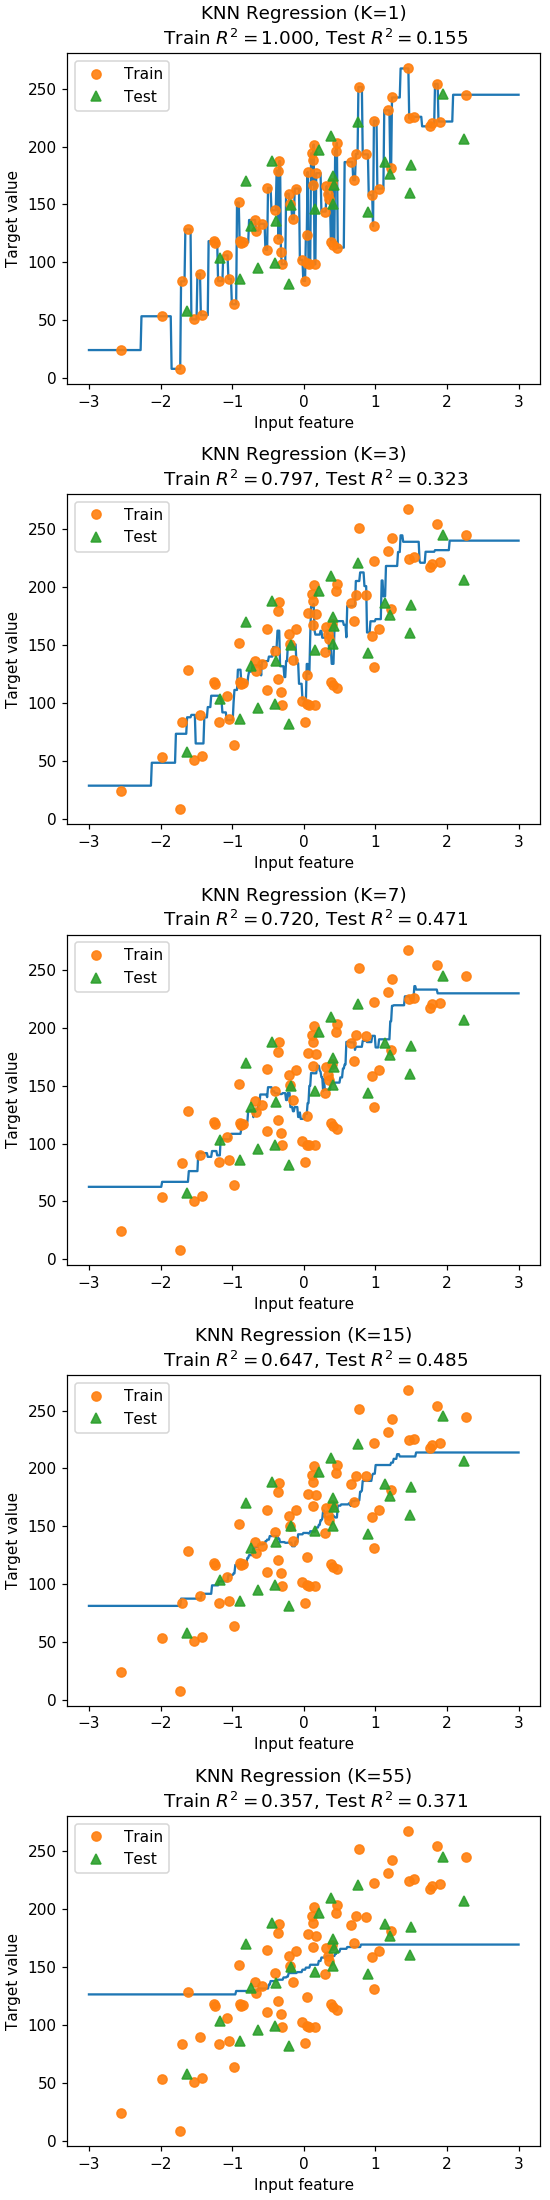

In [6]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5, 20))
X_predict_input = np.linspace(-3 , 3, 500).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1
                                                   , random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$, Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Linear models for regression

### Linear regression

In [7]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

# is the score from the regressor the same as accuracy and therefore accuracy
# is the same as R^2?
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear regression: example plot

<IPython.core.display.Javascript object>


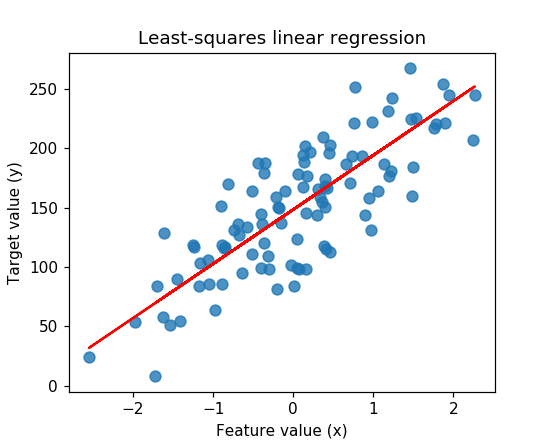

In [8]:
plt.figure(figsize=(5, 4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
# plot the fitted line using the linreg regressor outputs
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime
                                                   , random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n:{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725806212
linear model coeff:
:[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.8

### Ridge regression

In [10]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime
                                                   , random_state=0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n:{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.4230358464188
ridge regression linear model coeff:
:[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.

#### Ridge regression with feature normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime
                                                   , random_state=0)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n:{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.3906385044165
ridge regression linear model coeff:
:[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha

In [15]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 88,     r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87,     r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87,     r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88,     r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86,     r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87,     r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84,     r-squared training: 0.31, r-squared test: 0.30



C:\Users\jerrison.li\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.5176443051143985e-18 / 1.1102230246251565e-16
  RuntimeWarning)


### Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime
                                                   , random_state=0)

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter=10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n:{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_))
                , key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
:[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624
Features with 